P3> Find the best Rooms under each Type in each city based on Reviews


-- initial step for uploading the data using Pandas from cleaned excel file for analysis

In [1]:
import pandas as pd
df = pd.read_excel("cleaned_data.xlsx")
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.head()

,ID,City,Location,PType,PPN,Nights,Beds,Baths,Reviews,Recent
0,IND137,Mumbai,Unknown,Entire Home/Apartment,3200,2.000000,1,1,4.000000,2022-03-12
1,IND138,Bangalore,Indiranagar,Private Room,1800,1.959184,1,1,2.000000,2023-02-15
2,IND139,Delhi,Hauz Khas,Entire Home/Apartment,4200,3.000000,2,2,3.853659,2021-12-25
3,IND140,Chennai,Teynampet,Shared Room,1000,1.000000,2,1,1.000000,2022-05-05
4,IND141,Hyderabad,Jubilee Hills,Entire Home/Apartment,3800,3.000000,3,3,5.000000,2022-08-20


In [ ]:
df_pvt=df.groupby('City','PType')['Reviews'].max().sort_values(ascending=False)
df_pvt

In [13]:
df_pvt = df.pivot_table(values=['Reviews','ID'],
                        index=['City', 'PType'], 
                        aggfunc='max')
df_pvt.sort_values(by='City')

ID   Reviews
City      PType                                  
Bangalore Entire Home/Apartment  IND186  6.000000
          Private Room           IND179  5.000000
          Shared Room            IND159  2.000000
Chennai   Entire Home/Apartment  IND174  5.000000
          Private Room           IND161  2.000000
          Shared Room            IND181  2.000000
Delhi     Entire Home/Apartment  IND178  7.000000
          Private Room           IND171  5.000000
          Shared Room            IND185  2.000000
Hyderabad Shared Room            IND173  3.000000
          Entire Home/Apartment  IND180  6.000000
          Private Room           IND155  3.000000
Kolkata   Entire Home/Apartment  IND176  5.000000
          Private Room           IND183  3.000000
          Shared Room            IND169  2.000000
Mumbai    Entire Home/Apartment  IND184  7.000000
          Private Room           IND148  3.000000
          Shared Room            IND177  3.853659
Pune      Entire Home/Apartment  IND182  6.000000
          Private Room           IND175  4.000000

-- Plot the output for better visualization

<Axes: title={'center': 'Best Room by Review in each City under each Type'}, ylabel='City,PType'>

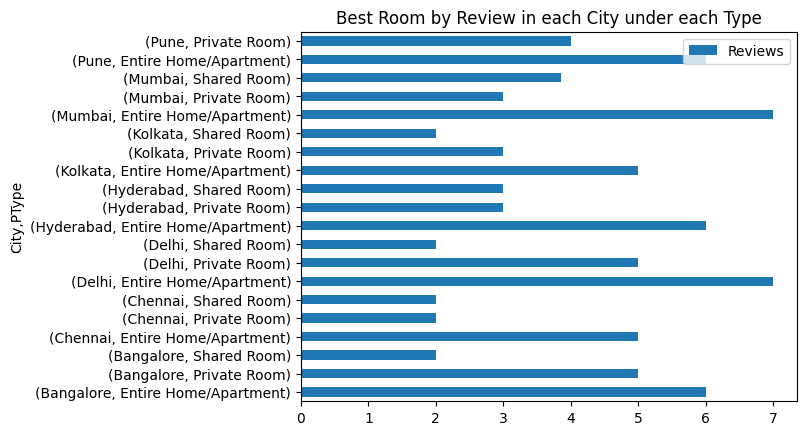

In [14]:
df_pvt.plot(kind='barh', legend=True, title='Best Room by Review in each City under each Type')

-- INFERENCE AND OBSERVATIONS

- Entire Home/Apartments Have the Best Reviews:

In every city, "Entire Home/Apartment" has the highest review scores (ranging from 5.0 to 7.0).
Delhi & Mumbai lead with 7.0 reviews, suggesting that travelers prefer renting full apartments in these cities.
Private Rooms Show Mixed Performance:

- Private rooms receive moderate reviews (mostly 3.0 to 5.0), indicating varied guest satisfaction.
- Best Private Room: Delhi (5.0), suggesting better quality in that segment.
- Shared Rooms Have the Lowest Reviews:

Shared rooms consistently receive low scores (mostly 2.0 - 3.85) across cities.
This suggests potential issues such as lack of privacy, amenities, or guest comfort.

- City-Wise Trends:

Mumbai & Delhi dominate with 7.0-rated Entire Apartments.
Bangalore, Pune, and Hyderabad follow closely with 6.0-rated Entire Apartments.
Shared rooms in Chennai, Delhi, and Kolkata have the lowest reviews (2.0), suggesting they need major improvements.